<a href="https://colab.research.google.com/github/ShahidHasib586/MIR-optimization/blob/main/ON_MIR_Chap_1_Some_Math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction: Numerical Optimization

This course is intended for Master 1 students in robotics and computer science.

Optimization theory is a mathematical framework that allows interpreting and solving a wide range of problems in Optimal Control, Identification, Numerical Analysis, Statistics, Mechanics, etc., using the same principles.

For all these problems, the approach will be the same. We need to find a mathematical model to represent the problem and a criterion to optimize. Numerical optimization then helps to find a set of parameters that minimizes this criterion. The solution is not analytical or exact but rather a numerical approximation.

The criterion to minimize can be an energy (e.g., in mechanics), a cost, a satisfaction index, a length (shortest path problems), a distance from a desired state (error between a measurement and a desired reference), a time, or any other quantity influenced by the system's parameters.

The resolution method depends on the type of model, the criterion, and the parameters. In this course, we will learn to classify problems and explore classical methods for solving them.

Typically, we aim to minimize the function:
$$f(x) \quad \text{with} \quad x \in \mathbb{R}^n$$

under the constraints:
\begin{align}
c_i(x) &= 0  \quad \text{for} \quad i=1,\dots,m \quad \text{(equality constraints)}\\
d_j(x) &\geq 0 \quad \text{for} \quad j=1,\dots,p \quad \text{(inequality constraints)}
\end{align}

$f(x)$ is called the cost function, objective criterion, or optimization criterion.

This is equivalent to minimizing the function:
$$f(x), \quad x \in \Omega \subset \mathbb{R}^n$$

where $\Omega$ is the feasible set:
$$\Omega = \{x \mid c_i(x) = 0, \quad i=1,\dots,m \quad \text{and} \quad d_j(x) \geq 0, \quad j=1,\dots,p \}$$

### Common Challenges

Some common difficulties encountered in numerical optimization include:
* The existence of local minima;
* Non-differentiability;
* High computational cost of evaluating the cost function.

*In practice, we generally only have local information about the cost function.*

---

We will implement some of these algorithms in Python, but our main focus will be on understanding the mechanics so that you *can effectively use numerical optimization libraries*.

Several software tools include such libraries: Matlab, Scilab, Mathematica, and Python.

Most of the algorithms covered in this course are available in the `optimize` library of SciPy. To use it, you need to add the following in your code:

```python
import scipy.optimize as sp_o






## Math reminder

If you fill like you need a bit more of this : http://faccanoni.univ-tln.fr/enseignements.html







### Derivability


**Definition**

---
Let $f$ be a numerical function with real variables. $\Omega$ is its domain of definition. $I$ is an open interval included in $\Omega$ and $x_0$ is a point on $I$.

$f$ is derivable at $x_0$ if and only if
$$ \underset{h\to 0}{\lim} \frac{f(x_0+h)-f(x_0)}{h}$$ exists in $\mathbb{R}$ and is finite.
This limit is called the derivative of $f$ at $x_0$, and is denoted $f'(x_0)$.

---

If the function is derivable at $x_0$, geometrically, calculating the derivative is equivalent to calculating the directrix of the tangeant of the curve at the point $x_0$.

### Unimodality

**Definition

---
Let f be a numerical function defined on $[a,b]$ and let $x^*$ be the argument of its minimum on the interval.

We say that f is unimodal on $[a,b]$ if it is strictly monotonically decreasing on $[a,x^*[$ and strictly monotonically increasing on $]x^*,b]$.

---

This implies that $\forall (x_1,x_2) \in [a,b] | x_1 < x_2$,

\begin{align}
    \mbox{if } & x_1>x^* \mbox{, then } f(x_1) < f(x_2) \\
    \mbox{and if } & x_2<x^* \mbox{, then } f(x_1) >f(x_2)
\end{align}

**An example of a unimodal function**

The function $(x-2)^²$ is a unimodal function.

I'll take this opportunity to draw it using Python.



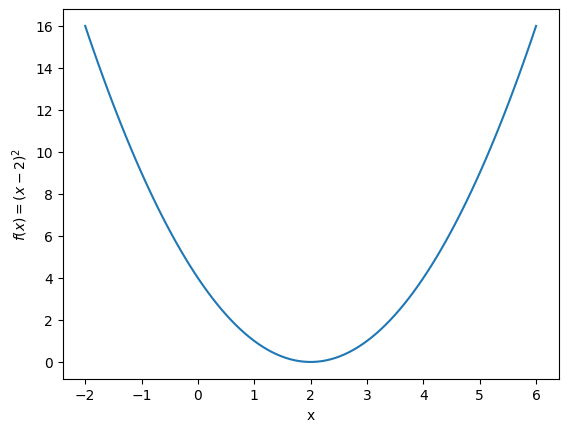

In [ ]:
#import the library
import numpy as np
import matplotlib.pyplot as plt

# here we construct a vector of 100 values
# evenly distributed between -2 and 6
# this code is interactive: you can change the
# values to test
x = np.linspace(-2,6,100)

# here we call the functions that plot
# the curve of f as a function of the values of the vector x
plt.plot(x,(x-2)**2)

# add text on axis
plt.ylabel('$f(x)=(x-2)^2$')
plt.xlabel("x")

# display the curve
plt.show()

### Convexity

**Definition**

---

A set $\Omega \subset \mathbb{R}$ is convex if and only if $$x=\alpha u + (1-\alpha)v \in \Omega, \forall u, v \in \Omega^2 \mbox{ and }  \alpha \in [0,1]$$

---

**Properties**

1) If $\Omega$ is convex and $\alpha \in \mathbb{R}$ then $\Psi = \left\{ x | x=\alpha u, u \in \Omega \right \}$ is convex.

2) If $\Omega_1$ and $\Omega_2$ are convex, then $\Psi = \Omega_1 \cap \Omega_2$ is convex and $\Psi = \left\{ x | x= u_1+u_2, u_1 \in \Omega_1 \mbox{ and } u_2 \in \Omega_2 \right \}$ is convex.

**Definition** Convex polytopes and polyhedra

---

Let $\mbox{x  be }\in \mathbb{R}^n$.

The set of $x$ such that $a^Tx=b, a\in\mathbb{R}^n$ defines a $n-1$ dimensional hyperplane which divides the space $\mathbb{R}^n$ into two convex semispaces $H^+$ and $H^-$.
\begin{align}
H^+ = \{ x|a^Tx \geq b\}
H^- = \{ x|a^Tx \leq b\}
\end{align}

---

The intersection of a finite number of semispaces is a convex polytope. If it is bounded, it is called a polyhedron. If it is bounded and has two dimensions then it is a polytogone.

**Definition** Convex function

---
A function is convex if its epigraph is a convex set.

---

**Definition** Convex function

---
$f:\Omega \to \mathbb{R}$ with $\Omega \subset \mathbb{R}$ is convex if :
$forall x,y \in \Omega^2 $ and $forall \alpha \in[0,1] $
$$f(\alpha x+(1-\alpha) y) < \alpha f(x) + (1-\alpha) f(y)$$


----

### Minimum of a function

#### Local minimum

**Definition** local minimum

---

$f:\Omega \to \mathbb{R}$ with $\Omega \subset \mathbb{R}$
$f$ has a local minimum at $x^*\in \Omega$ if there exists $B(x^*, \varepsilon) = \{x| \Vert x-x^*\Vert < \varepsilon\}$ such that $f(x)\geq f(x^*) $, $\forall x\in(x^*, \varepsilon)$

---

#### Local minimum in the strict sense

**Definition**

---
$f:\Omega \to \mathbb{R}$ with $\Omega \subset \mathbb{R}$
$f$ has a local minimum at $x^*\in \Omega$ if there exists $B(x^*, \varepsilon) = \{x|  \Vert x-x^* \Vert < \varepsilon\}$ such that $f(x)> f(x^*) $, $\forall x\in(x^*, \varepsilon)$ and $x \neq x^*$.

---

#### Global minimum

**Definition**

---
$f:\Omega \to \mathbb{R}$ with $\Omega \subset \mathbb{R}$
$f$ admits a global minimum in $x^*\in \Omega$ if $f(x)\geq f(x^*) $, $\forall x\in \Omega$

---
#### Minima of convex functions
**Definition**

---
Let $f:\Omega \to \mathbb{R}$ be a function with $\Omega \subset \mathbb{R}$.
if $f$ is convex over $\Omega$ then every local minimum is a global minimum.

---


#### Exercise :
Show that a local minimum is in fact a global minimum when the function is convex.

#### Correction:

Let $y=x+z\in\Omega$ and $x$ be a local min.

We can write

$f(x+\alpha z ) = f(x + \alpha (y-x))$  avec $\alpha \in  [0,1]$

and so by rearranging

$f(x+\alpha z ) = f(\alpha y+(1-\alpha) x)$

and **since f is convex**

$f(\alpha y+(1-\alpha) x) \leq \alpha f(y) +(1-\alpha) f(x) $


Subtracting $f(x)$, we obtain

$f(\alpha y+(1-\alpha) x)-f(x) \leq \alpha (f(y) -f(x))  $

Using the initial expression $f(x+\alpha z )$

$f(x+\alpha z)-f(x) \leq \alpha (f(y) -f(x)) $

or **since x is a local minimum**, there exists $\alpha_0 >0 $ such that

$f(x+\alpha_0 z)\geq f(x)$

so
there exists $\alpha_0$ such that

$f(x+\alpha_0 z)-f(x)\geq 0$

so $𝑓(𝑦)-𝑓(𝑥) \geq 0$

so $𝑓(x) \leq 𝑓(y), \forall y \in \Omega$

so $x$ is a global minimim










## Mathematical reminders on matrices

### Symmetry

**Definition**
A matrix $A$ is symmetric if $A^T=A$, or $A^T$ is the transpose of $A$.

### Positivity

**Definition** A matrix $A$ is positive if its eigenvalues are positive. In other words, if and only if $x^TAx>0, \forall x \neq 0$.

*Notes: The singular values of the square matrix $A$ are the positive square roots of the eigenvalues of the symmetric matrix $A^TA$*.


**Property**

$A=A^T>0$ avec

$A=\begin{bmatrix}
                    a_{11} & \cdots & a_{1n} \\
                    \vdots & \ddots & \vdots \\
                    a_{n1} & \cdots & a_{nn}
\end{bmatrix}$

$\Leftrightarrow \lambda_i\{A\} >0, i=1, \cdots, n$

$\Leftrightarrow det\{A_k\} >0, k=1, \cdots, n$ with

$A_1=a_{11}$,

$A_2=\begin{bmatrix}
                    a_{11} &  a_{12} \\
                    a_{12} & a_{22}
                    \end{bmatrix}$ ,
                    
$A_3=\begin{bmatrix}
                    a_{11} & a_{12}  & a_{13} \\
                    a_{12}  & a_{22}  & a_{23} \\
                    a_{13} & a_{23}  & a_{33}
\end{bmatrix}$,
                    
and $A_n=A$

### Semi Définie Positive

**Définition**

---

Une matrice $A$ est semi positive si ses valeurs propres sont positives ou nulles.
En d'autres termes si et seulement si $x^TAx\geq0, \forall x$.

---


### Rang

**Définition**

Given two finite-dimensional vector spaces $U$ and $C$, **the rank of an application $A:U \rightarrow C$** is the dimension of $ImA$ it is also the dimension of the largest square sub-matrix extracted from $A$.

Note the rank $rg(A)$. It is also the number of non-zero singular values.




## Gradient et Hessien

### Gradient

**Définition**
Let f be a function $f : \mathbb{R}^n \to \mathbb{R}$ its gradient is
$$ \nabla f =   \begin{bmatrix} \frac{\partial f}{\partial x_1}&\\\frac{\partial f}{\partial x_2} \\ \vdots \\\frac{\partial f}{\partial x_n} \end{bmatrix} $$

### Hessien

**Definition**
Let f be a function $f : \mathbb{R}^n \to \mathbb{R}$ son Hessien est
$$ \mathbf{H}(x)=\nabla (\nabla^T f) =\begin{bmatrix} \frac{\partial^2 f}{\partial^2 x_1} & \frac{\partial^2 f}{\partial x_1 \partial x_2}& \dots & \frac{\partial^2 f}{\partial x_1 \partial x_n}\\\frac{\partial^2 f}{\partial x_2 \partial x_1}&&& \vdots \\ \vdots \\\frac{\partial^2 f}{\partial x_n \partial x_1}&\dots&\dots&\frac{\partial^2 f}{\partial^2 x_n }\end{bmatrix} $$

### Directional derivative
Given a function $f : \mathbb{R}^n \to \mathbb{R}$, the directional derivative of $f$ at point $x$ in direction $d$ is


\begin{align}
\frac{\partial f}{ \partial d} (x) &= \underset{h\to 0}\lim  \frac{f(x+hd)-f(x)}{h}\\
&= \frac{d}{dh}f(x+hd)| _{h=0}\\
&= \frac{\partial f}{\partial x_1} (x+hd) |_{h=0} d_1 + \dots + \frac{\partial f}{\partial x_n} (x+hd) |_{h=0} d_n\\
&= \nabla f(x)d
\end{align}


if $\Vert d  \Vert = 1$, the **directional derivative** is the **rate of increase** of $f$ in the $d$ direction at the $x$ point.

 * The rate of increase is maximum in the direction of the gradient.
 * The gradient indicates the direction of greatest slope.

### Contours of a function

Let be a function $f : \mathbb{R}^n \to \mathbb{R}$.

* $y=f(x)$ defines a surface in $\mathbb{R}^{n+1}$.

* $f(x)=c$, with $c$ constant define **curves** or **contours**.

**Definition**
A contour of level $c$ is the set of points $S(c)=\{x|f(x)=c\}$

---
#### Rosenbrock function example
In the next cell, we'll see how to draw contours in Python.

$f(x_1,x_2)=100(x_2-x_1^2)^2+(1-x_1)^2$


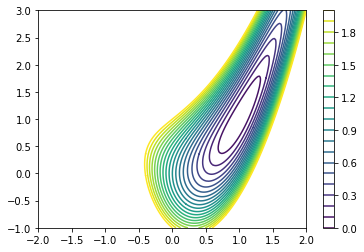

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x1,x2) :
    """Fonction de Rosenbrock a deux variables"""
    return (x2-x1**2)**2+(1-x1)**2

x1, x2 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-1,3,201))

#trace des lignes de niveaux
plt.contour (x1,x2,rosenbrock(x1,x2),np.linspace(0,2,21))
plt.colorbar()

## Taylor and Mean Formulas

### Taylor formula

**Definition**

---
Let $f:\Omega \in \mathbb{R}^n \to \mathbb{R}$, be an application of class $C^2$.

Then

$f(x+h)=f(x)+\nabla f(x)^T h + \frac{1}{2}h^T f‘’(x) h + o(||h||^2) $

---

### Taylor formula with integral remainder

**Definition**

---
Let $f:\Omega \in \mathbb{R}^n \to \mathbb{R}$ be an application of class $C^1$. If the segment $[x, x+h]$ is included in $\Omega$,

then

$f(x+h)=f(x)+ \int_0^1 \nabla f(x+th)^T h dt$.

---

### Average formula

**Definition**

---
Let $f:\mathbb{R} \to \mathbb{R}$, an application of class $C^1$ on the segment $[x,y]$

then there exists $z \in [x,y]$ such that

$f(y)=f(x)+ f'(z)(y-x) $

---

### Proof: the gradient is perpendicular to the contour

Let the contour S of level $f(x_0)$ pass through $x_0$.

$S=\{x|f(x)=f(x_0)\}$

Let $\in S$ be a curve
parametrized by
$v(t) : \mathbb{R} \to \mathbb{R}^n$
where $v(t_0)=x_0$ and $v(t)=x \in S$.

The tangent to this curve is in the direction $\frac{dv}{dt|t=t_0}$.

We have

$f(v(t))=f(v(t_0))=f(x_0)$

so

$\frac{df}{dt}(v(t))|_{t=t_0}=0$

so if we develop

$\frac{\partial f}{\partial x_1}(v(t_0))\frac{dv_1}{dt|t=t_0}+ ... +\frac{\partial f}{\partial x_n}(v(t_0))\frac{dv_n}{dt|t=t_0}=0$

so

$\nabla f^T(x_0)\frac{dv}{dt|t=t_0}=0 $

and therefore
$\nabla f^T(x_0) \perp S$ en $x_0$, $\forall x_0$


### Convexity and first derivability

given a function $f:\Omega \to \mathbb{R}$ with $f\in C^1$ and $\Omega \in \mathbb{R}^n$ convex, then $f$ is convex if
$$f(y)\geq f(x)+\nabla f^T(x)(y-x), \forall x, y\in \Omega^2$$

### Convexity and second derivability

given a function $f:\Omega \to \mathbb{R}$ with $f\in C^2$ and $\Omega \in \mathbb{R}^n$ convex, then $f$ is convex if
$$(y-x)^T H(x)(y-x)\geq 0, \forall x, y\in \Omega^2$$

**Corollary**
If $\Omega \in \mathbb{R}^n$ is a convex open
Then $f$ is convex if
$$H(x)\geq 0, \forall x \in \Omega$$




## Necessary conditions for the existence of a minimum

To find a minimum, almost all the methods below start from the following point of view: we know a point $x_0$ and the value $f(x_0)$; by moving locally from $x_0$ we can determine whether $f$ is increasing or decreasing. Since the simplest move is a straight line, we will make small moves from $x_0$ in directions $d$, trying to improve the value of $f$.


### Eligible directions
**Definition**

An admissible direction at $x_0$ is a vector $d$ along which we can move from $x_0$ while remaining in $\Omega$.

---
$d\in \mathbb{R}^n, d\neq 0$ is an **admissible direction at a point $x$** if there exists $\eta>0$ such that $x+\alpha d\in\Omega, \forall \alpha \in [0,\eta]$ $.

---

The set of admissible directions at $x_0$ is sometimes referred to as $D^{ad}(x_0)$.

Let $d \in D^{ad}(x_0)$, if there exists $\gamma < \alpha $ such that $\forall t \in[0,\gamma]$, we have $f(x_0+td)<f(x_0)$, the admissible direction $d$ is a descent direction.

**Note** *If $x$ is an interior point then all directions are admissible.











### Necessary conditions of the first order
Let $f:\Omega \to \mathbb{R} \Omega \subset \mathbb{R}^n f\in C^1$

If $f$ has a local minimum in $x^*\in \Omega$ then $\forall d$ admissible in $x^*$
$$d^T\nabla f(x^* )\geq 0$$

The rate of increase is positive.

**Corollary** Case of the interior point:


Let $f:\Omega \to \mathbb{R} \Omega \subset \mathbb{R}^n f\in C^1$

If $x^*$ minimizes $f$ locally and if $x^*$ is an interior point of $\Omega$ then
$$\nabla f(x^*)=0$$

**Demonstration**

$d^T \nabla f(x^*) \geq 0, \forall d \in \mathbb R^n$

so

$ d^T \nabla f(x^*) \geq 0$
and
$-d^T \nabla f(x^*) \geq 0, \forall d \in \mathbb R^n$

so
$\nabla f(x^*) = 0$




### Second-order necessary conditions


Let $f:\Omega \to \mathbb{R}, \Omega \subset \mathbb{R}^n \mbox{ and } f\in C^2$

$f$ reaches a local minimum at $x^*$ and $d$ is an admissible direction

if
$d^T\nabla f(x^*)=0 \mbox{ then } d^T H(x^*)d>0$


**Corollary** Case of the interior point:


Let $f:\Omega \to \mathbb{R} \Omega \subset \mathbb{R}^n $ and $f\in C^2$.

If $x^*$ is an interior point of $\Omega$ and $x^*$ minimizes $f$, then
\begin{align}
  \nabla f(x^*) &= 0\\
  H(x^*) &\geq 0
\end{align}

**Demonstration**

Let $x^*$ be the abscissa of a minimum, and let $\alpha \in \mathbb{R}^+ $ be $.

Let $x = x^*+\alpha d$

The limited expansion can be written as

$f(x)=f(x^*)+\frac{df(x)}{d\alpha}|_{a=0} \alpha + \frac{d^2f(x)}{d^2\alpha}|_{a=0} \frac{\alpha^2}{2}+ O(\alpha^2)$

Which can be written as  

$f(x)=f(x^*)+\nabla f^T(x^*)d\alpha + d^T H(x^*) d \frac{\alpha^2}{2}+ O(\alpha^2)$


And since $\nabla f^T(x^*)=0 $ then

$f(x)=f(x^*)+ d^T H(x^*) d \frac{\alpha^2}{2}+ O(\alpha^2)$


By the absurd, if $H(x^*)<0$ then
\exists \alpha | f(x)<f(x^*)$.

Therefore $H(x^*)\geq0$.





## Sufficient conditions for the existence of a minimum


Let $f:\Omega \to \mathbb{R} \Omega \subset \mathbb{R}^n f\in C^2$ and $x^*$ is an interior point of $\Omega$.

If
\begin{align}
  \nabla f(x^*) &= 0\\\
  H(x^*) &> 0
\end{align}

Then $f$ has a local minimum in the strict sense at $x^*$.

**Corollary** Case of convex functions

Let $f \in C^2$, $f$ convex, $f : \Omega \to \mathbb{R} \Omega \subset \mathbb{R} ^n$ convex
Then $f$ has a global minimum at $x^* \in \Omega$.

1. if $\nabla f ^T(x^*)(y-x^*)\geq 0 \forall y \in \Omega$
$$iff \nabla f ^T (x^*)d \geq 0, \forall \mbox{ admissible direction d}$$

2. if $\nabla f ^T(x^*)=0$ if $x^* $ is an interior point of $\Omega$.

## Structure of an iterative algorithm


### Definition: Algorithm

This is an application $F$ of a space $\Omega$ in itself. The flow of this algorithm from the initial condition $x^0$ will be of the form

\begin{equation}
x_0 \in \Omega | x_k \Rightarrow F(x_k), k = 1, 2, 3,...  
\end{equation}

### Python: classic structure of an iterative algorithm

In [ ]:
def algo (F , x0 , ... , tol =1 e -6 , Niter =1000) :
    # Initialisation
    xn = x0 # first element of the list
    L = [] # the list [x_0 , ... x_{n -1}] , empty

    # Principal Loop
    for n in range ( Niter ) : # avoid while
        if ... < tol : # tolerance criteria
            return xn , L # return the list [x_0 , ... x_{n -1}].
        L . append ( xn ) # Else , add xn to the list ,
        xn = ... # then update xn with the iterative formula

    print (" Error :  ", Niter , " iterations ")

SyntaxError: invalid syntax (<ipython-input-2-ac35017c0cb7>, line 1)

#### Convergence

An algorithm is said to **converge** if the sequence of values it generates tends towards a desired limit in the space under consideration.


#### Speed of Convergence

##### Speed of linear convergence

If $ \underset{k \to +\infty}{lim \sup} \frac{\Vert{x^{k+1}-x^*}\Vert}{\Vert{x^{k}-x^*}\Vert}\longrightarrow \alpha <1$

we say that **convergence is linear** and the **rate of convergence** is $\alpha$

##### Superlinear convergence speed

If $ \underset{k \to +\infty}{\lim \sup} \frac{\Vert{x^{k+1}-x^*}\Vert}{\Vert{x^{k}-x^*}\Vert}=0$

we say that **convergence is superlinear**.


##### Speed of superlinear convergence of order $\gamma$
If $ \underset{k \to +\infty}{\lim \sup} \frac{\Vert{x^{k+1}-x^*}\Vert}{\Vert{x^{k}-x^*}\Vert^\gamma}=M<+\infty$

we say that **convergence is superlinear of order $\gamma$** and in particular, if $\gamma =2$, we speak of **quadratic convergence speed**.


# Unconstrained methods
### One-dimensional problems


The problems are of the form
$$\min{ f(x)}, x \in \mathbb{R}$$

* One-dimensional search methods
* Gradient methods
* Conjugate direction methods
* Newton's methods and Levenberg Marquardt's method
* Quasi-Newton methods
* Non-gradient methods
* Solving non-linear equations.

### One-dimensional search methods

Assumption: $f$ is unimodal on $[a,b]$.

These methods are only valid for functions :
* with real values,
* for which we know an interval over which it has a unique minimum.




#### Dichotomy methods

This method requires two evaluations of the cost function and has a linear convergence speed $\alpha=\frac{1}{2}$.

Let there be 5 points $a= x_1 < x_2 < x_3 < x_4 < x_5 = b$.

The 3 intermediate points are chosen as follows
* $x_3$ as the midpoint of $[a,b]$: $x_3=\frac{a+b}{2}$.
* $x_2$ as the midpoint of $[a,x_3]$: $x_2=\frac{a+x_3}{2}$.
* $x_4$ as the midpoint of $[x_3,b]$: $x_4=\frac{x_3+b}{2}$.

*Exercise: Draw a picture to describe the possible cases*.

Unless the solution lies on one of the bounds of the interval, we will always have a triplet which we will denote $(y_1,y_3,y_5)$, such that $(f(y_1)> f(y_3)< f(y_5))$, and the optimal solution $x^*$ necessarily belongs to the interval $[y_1, y_5]$ which is strictly included in $[x_1, x_5]$, i.e. $[a,b]$.

In most cases, the new interval $[y_1,y_5]$ is half of $[x_1, x_5]$ because two quarters have been removed.

New intermediate points are then determined using the same principle to ensure that the algorithm is regular:
* $y_3$ as the midpoint of $[y_1,y_5]$: $y_3=frac{y_1+y_5}{2}$.
* $y_2$ as the midpoint of $[y_1,y_3]$: $y_2=\frac{y_1+y_3}{2}$.
* $y_4$ as the midpoint of $[y_3,y_5]$: $y_4=\frac{y_3+y_5}{2}$.

After $n$ iterations of the function $f$, the original interval will have been reduced by a factor of $2^{(n-3)/2}$.

#### Golden section method

This method requires an evaluation of the cost function and has a linear convergence speed of $\alpha=\frac{\sqrt{5}-1}{2}$.

This method is almost the same as the previous one except that the intervals chosen are of different sizes.
Instead of dividing the uncertainty interval into 4, we divide it into 3 $I=[x_1, x_2]\bigcup[x_2,x_3]\bigcup[x_3,x_4]$ . At each iteration, we therefore only have an evaluation of the additional cost function.

If we denote $L^k = L([{x_1}^k,{x_4}^k])$ the length of the uncertainty interval at an iteration $k$. We want $\frac{L^{k+1}}{L_k}=\gamma<1$, so $[{x_1}^k,{x_2}^k]$ and $[{x_3}^k,{x_4}^k]$ must be the same length. This means that ${x_2}^k$ and ${x_3}^k$ are symmetrical about the midpoint of the interval $[{x_1}^k,{x_4}^k]$.

Then
$${x_2}^k - {x_1}^k = {x_4}^k-{x_3}^k = \rho( {x_1}^k,{x_4}^k) | \rho <1$$
If
$$ f({x_2}^k) < f({x_3}^k)\mbox{ alors }x^* \in [{x_1}^k,{x_3}^k] $$
Else if
$$ f({x_2}^k) \geq f({x_3}^k)\mbox{ alors }x^* \in [{x_2}^k,{x_4}^k] $$

Let $\rho = {1}/{2(\sqrt{5}-1 )}$.



#### Fibonnacci sequence method

In this method, $\rho$ is modified at each iteration to maximise the speed of convergence.
\begin{align}
\rho^1&=1-\frac{R_N}{R_{N+1}}\\
\rho^2&=1-\frac{R_{N-1}}{R_{N}}\\
\vdots &\\
\rho^k&=1-\frac{R_{N-k+1}}{R_{N-k}}\\
\vdots &\\
\rho^N&=1-\frac{R_1}{R_{2}}\\
\end{align}

where $R_k$ is the Fibonnacci suite
$$\left\{
 \begin{eqnarray}
    R_{k+1}&=&R_k+R_{k-1}\\
    R_{0}&=&1\\
    R_{-1}&=&0
 \end{eqnarray}
\right.
$$

## Equation solving in 1 dimension

*Note that these methods do not allow you to find a minimum but to find zeros.





#### Newton Raphson method

Let $f$ be a function of the real variable, once continuously derivable, which we note: $f\in C^1(\mathbb{R})$, **which we know admits at least one zero**.

If we know the values of $f$ and its derivative $f'$ at a point $x_0$, the function can be linearised around the point $x_0$ using Taylor expansion to order 1
$$
g(x) = f(x_0)+f'(x_0)(x-x_0)
$$

g$ is affine at $x$ and we can calculate its unique zero

\begin{align}
       g(x_1)&=0
 \iff 0 &= f(x_0)+f'(x_0)(x_1-x_0)\\\
 \iff x_1 &= x_0-\frac{f(x_0)}{f'(x_0)}
\end{align}

By iterating the procedure, we find the sequence $x_k$ which converges to $0$ under certain conditions.

**Theorem 1**
Suppose $f\in C^2$ and call $x^*$ a zero of $f$. Then if $f'(x^*)\neq 0$ and $x^{0}$
is close enough to $x^*$, the sequence generated by Newton's method converges to $x^*$ and the speed of convergence is quadratic


#### Secant method

The derivative of the function $f$ is not always available. It is then possible to work from an approximation.

To do this, we need two initial values $x_0$ and $x_1$ and the corresponding values of $f$. As before, the function $f$ is approximated by the affine function $g$ which passes through the points $(x_0, f(x_0))$ and $(x_1, f(x_1))$. We then define the new point $x_2$ as follows

$$
  x_2 = x_1 - \frac{x_1-x_0}{f(x_1)-f(x_0)}f(x_1)
$$

**Algorithm
More generally, with starting points $x_0$ and $x_1$ we define
$$
  x_{k+1} = x_k - \frac{x_k-x_{k-1}}{f(x_k)-f(x_{k-1})}f(x_{k-1})
$$
recurrence that can be stopped by testing the number of iterations or the proximity between two successive values.


### Case of a non-derivable function

1. Use finite differences instead of derivatives
2. Golden number or Fibonacci sequence method if an interval where the function is monotonic has been identified.
3. Three-point quadratic interpolation with minimum search.